<a href="https://colab.research.google.com/github/Nzaya/Online-Shoppers/blob/master/Online_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION

Kira Plastinina  is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to **learn the characteristics of customer groups.**

Perform clustering and dimensionality reduction stating insights drawn from your analysis and visualizations.

Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering, PCA vs t SNE highlighting the strengths and limitations of each approach in the context of your analysis.

# INSTALLING R PACKAGES

In [1]:
#Installing packages

install.packages('data.table')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [2]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [3]:
install.packages('DataExplorer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘igraph’, ‘gridExtra’, ‘networkD3’



In [4]:
install.packages('magrittr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [5]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [6]:
install.packages('readr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [7]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [8]:
install.packages('purrr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [9]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [10]:
install.packages("fviz_cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘fviz_cluster’ is not available (for R version 3.6.1)”

In [11]:
install.packages("pacman")

# List of packages
package_list = c( "lubridate", "readxl", "tidyr", "Hmisc", "skimr",
                  "ggcorrplot","caret", "caretEnsemble", "PerformanceAnalytics",
                  "kableExtra", "kernlab")
                  
# Load/Install packages
suppressMessages(pacman::p_load(package_list, character.only = TRUE))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


# LOADING THE DATASET

In [72]:
#Loading the dataset

library('data.table')
online= fread('http://bit.ly/EcommerceCustomersDataset')
head(online)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


# FEATURE ENGINEERING


In [13]:
#Checking the size of our dataset

dim(online)

[1] 12330    18

In [14]:
#Description of our dataset
library(dplyr)
glimpse(online)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following object is masked from ‘package:kableExtra’:

    group_rows

The following objects are masked from ‘package:xts’:

    first, last

The following objects are masked from ‘package:Hmisc’:

    src, summarize

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser        

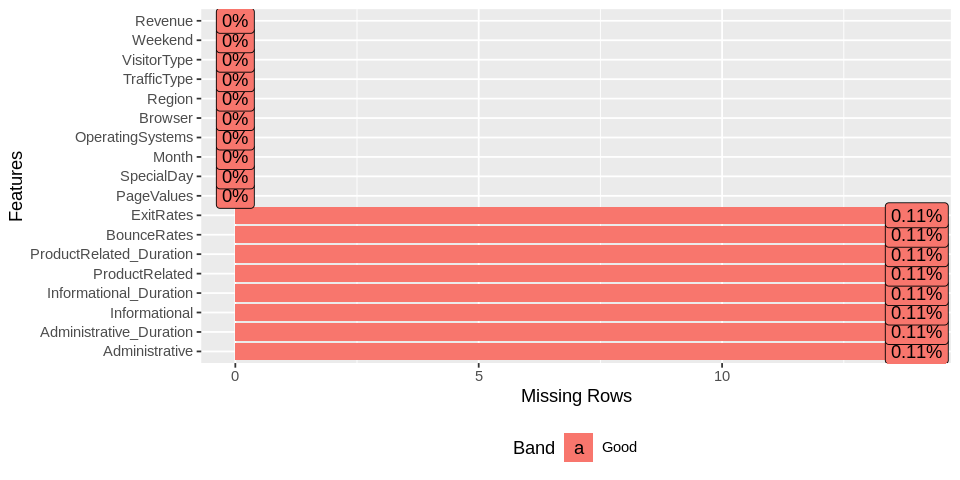

In [74]:
#Checking for missing values using the DataExplorer Package

library(DataExplorer)
options(repr.plot.width=8, repr.plot.height= 4)
plot_missing(online)

In [75]:
#Omitting the missing values to have a workable dataset

online= na.omit(online)

#Size of the dataset
dim(online)

[1] 12316    18

In [17]:
# Checking if the data types are correct for each variable.
str(online)

Classes ‘data.table’ and 'data.frame':	12316 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Retu

In [0]:
# Factor variables changed to their appropriate data type.

online$OperatingSystems=as.factor(online$OperatingSystems)
online$Browser=as.factor(online$Browser)
online$Region=as.factor(online$Region)
online$Weekend=as.factor(online$Weekend)
online$Revenue=as.factor(online$Revenue)
online$SpecialDay=as.factor(online$SpecialDay)
online$TrafficType=as.factor(online$SpecialDay)

In [19]:
# Confirming the transformation

str(online)

Classes ‘data.table’ and 'data.frame':	12316 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : Factor w/ 6 levels "0","0.2","0.4",..: 1 1 1 1 1 1 3 1 5 3 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 

In [20]:
#Describing the data

describe(online)

online 

 18  Variables      12316  Observations
--------------------------------------------------------------------------------
Administrative 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12316        0       27    0.895    2.318    3.177        0        0 
     .25      .50      .75      .90      .95 
       0        1        4        7        9 

lowest :  0  1  2  3  4, highest: 22 23 24 26 27
--------------------------------------------------------------------------------
Administrative_Duration 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12316        0     3336    0.892    80.91    124.9      0.0      0.0 
     .25      .50      .75      .90      .95 
     0.0      8.0     93.5    225.1    348.9 

lowest :   -1.000000    0.000000    1.333333    2.000000    3.000000
highest: 2407.423810 2629.253968 2657.318056 2720.500000 3398.750000
--------------------------------------------------------------------------------
In

In [21]:
# Getting some summary statistics on the numerical variables

library(purrr)
#library(repurrrsive)

online %>% select_if(is.numeric) %>% map(~summary(.))


Attaching package: ‘purrr’

The following object is masked from ‘package:data.table’:

    transpose

The following object is masked from ‘package:kernlab’:

    cross

The following object is masked from ‘package:caret’:

    lift



$Administrative
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   2.318   4.000  27.000 

$Administrative_Duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1.00    0.00    8.00   80.91   93.50 3398.75 

$Informational
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.504   0.000  24.000 

$Informational_Duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1.00    0.00    0.00   34.51    0.00 2549.38 

$ProductRelated
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.00   18.00   31.76   38.00  705.00 

$ProductRelated_Duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -1.0   185.0   599.8  1196.0  1466.5 63973.5 

$BounceRates
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.003119 0.022152 0.016684 0.200000 

$ExitRates
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01429 0.02512 0.04300 0.05000 0.20000 

$PageValues
   Min. 1st Qu.  Median    Mean 3rd Qu.

# UNIVARIATE ANALYSIS

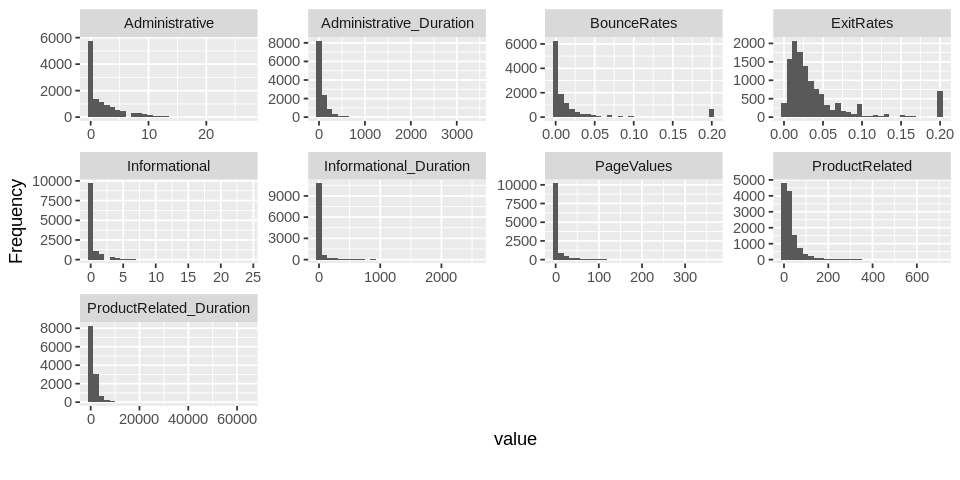

In [22]:
#Plotting a histogram to analyse/represent Continuous Variables.

plot_histogram(online)

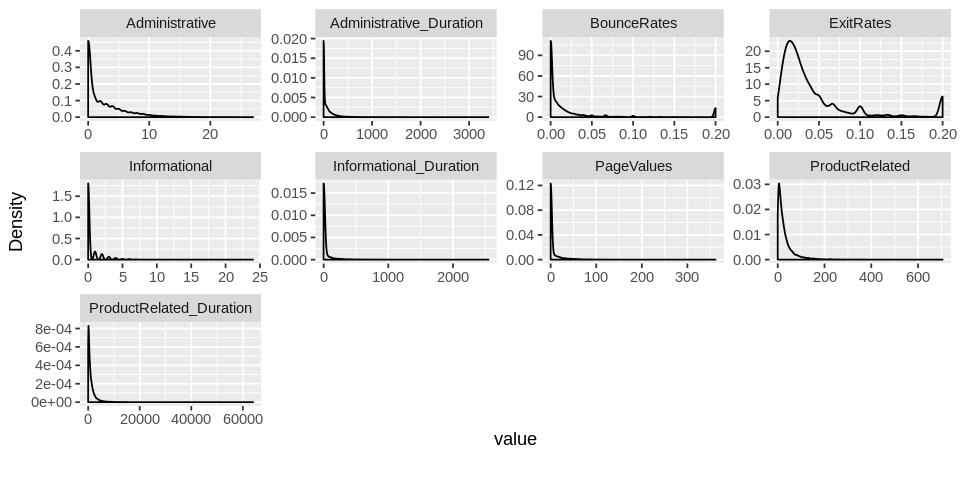

In [23]:
#Plotting Density plots to represent continous variables

plot_density(online)

# MULTIVARIATE ANALYSIS

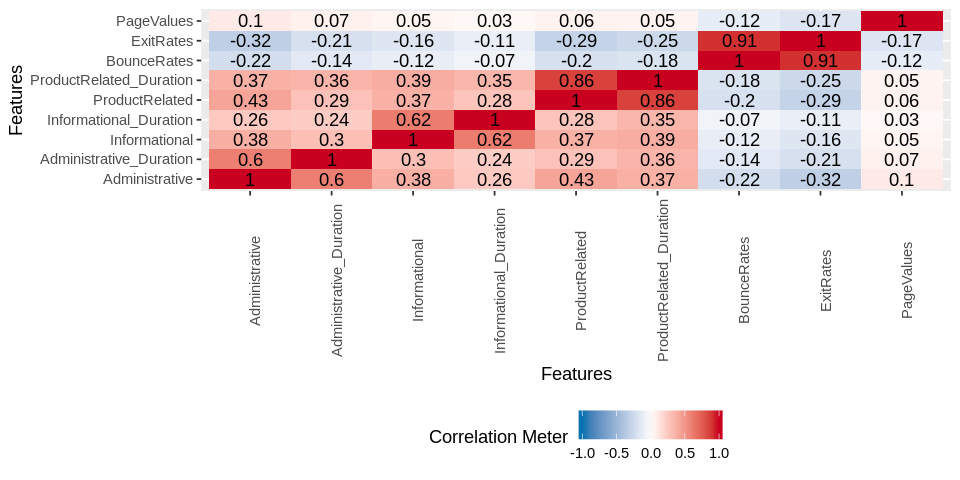

In [24]:
#Correlation Matrix

plot_correlation(online, type = 'continuous','Review.Date')

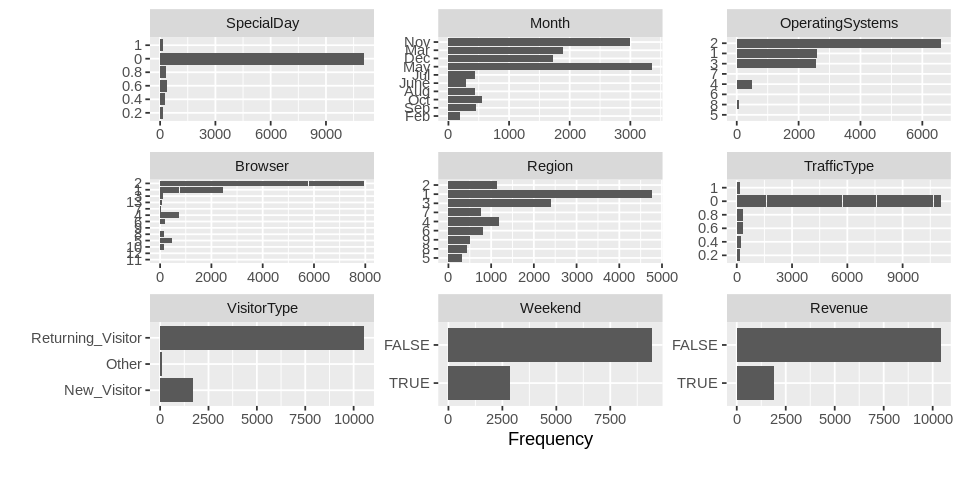

In [25]:
#Plotting bar plots for the Categorical variables

plot_bar(online)

In [26]:
# A nice presentable/shareable report rendered markdown in html.

create_report(online)



processing file: report.rmd


  |..                                                               |   2%
   inline R code fragments

  |...                                                              |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                            |   7%
  ordinary text without R code

  |......                                                           |  10%
label: introduce
  |........                                                         |  12%
  ordinary text without R code

  |.........                                                        |  14%
label: plot_intro
  |...........                                                      |  17%
  ordinary text without R code

  |............                                                     |  19%
label: data_structure
  |..............                                                   |  21%
  ordinary text without R code

  |...............                      

output file: /content/report.knit.md



/usr/bin/pandoc +RTS -K512m -RTS /content/report.utf8.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /content/report.html --smart --email-obfuscation none --self-contained --standalone --section-divs --table-of-contents --toc-depth 6 --template /usr/lib/R/site-library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:yeti' --include-in-header /tmp/RtmpTZNBtn/rmarkdown-str7b6a8e7cdd.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: report.html


Report is generated at "/content/report.html".


# K MEANS CLUSTERING

Since we are doing unsupervised Learning , we will drop our y that is Revenue

Partitioning n observations into a fixed number of k clusters. The algorithm will find homogeneous clusters


In [27]:
#Previewing our dataset

head(online)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,0,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,0,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,0,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,0,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,0,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,0,Returning_Visitor,FALSE,FALSE


In [28]:
#Dropping the Revenue column

online.new= online[, c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)]
online.class=online[, 'Revenue']
head(online.new)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,0,Returning_Visitor,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,0,Returning_Visitor,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,0,Returning_Visitor,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,0,Returning_Visitor,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,0,Returning_Visitor,TRUE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,0,Returning_Visitor,FALSE


In [29]:
#Previewing the Revenue column

head(online.class)

Revenue
<fct>
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE


In [0]:
# One hot encoding of the factor variables.

dmy = dummyVars(" ~ .", data = online.new)
df = data.frame(predict(dmy, newdata = online.new))

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 615800)”Warning message:
“Quick-TRANSfer stage steps exceed

[1] 45790550184 21541302147 13210770974  9266441960  6026144634  4760860183
 [7]  3974855489  2603305024  2134019541  1822910996  1641377931  1500589321
[13]  1410027829  1334619315  1249818508

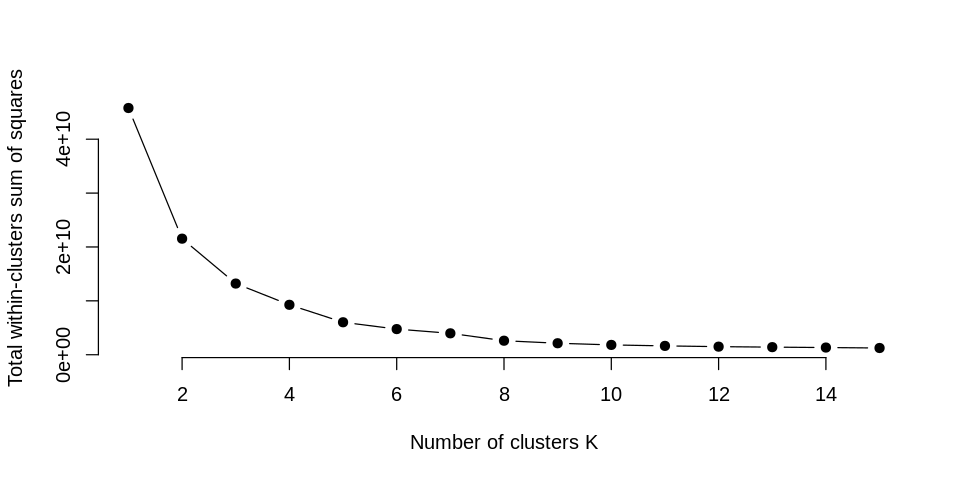

In [34]:
#Elbow Method for finding the optimal number of clusters

set.seed(123)
# Compute and plot wss for k = 2 to k = 15.

k.max <- 15
data <- df
wss <- sapply(1:k.max, 
              function(k){kmeans(df, k, nstart=50,iter.max = 15 )$tot.withinss})
wss
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [35]:
# centers is the predefined number of clusters
#nstart times to improve the returned model

stats::kmeans(df, centers = 2, nstart = 10)

K-means clustering with 2 clusters of sizes 11383, 933

Cluster means:
  Administrative Administrative_Duration Informational Informational_Duration
1       2.046736                70.51109      0.401388                25.3425
2       5.624866               207.73068      1.755627               146.3098
  ProductRelated ProductRelated_Duration BounceRates  ExitRates PageValues
1       23.26329                794.6432 0.023433404 0.04482478   5.777121
2      135.47481               6093.2140 0.006524418 0.02077043   7.345740
  SpecialDay.0 SpecialDay.0.2 SpecialDay.0.4 SpecialDay.0.6 SpecialDay.0.8
1    0.8958974    0.014934552     0.02002987    0.030132654     0.02653079
2    0.9292605    0.008574491     0.01607717    0.008574491     0.02465166
  SpecialDay.1   MonthAug  MonthDec    MonthFeb   MonthJul  MonthJune
1   0.01247474 0.03505227 0.1424053 0.015900905 0.03496442 0.02336818
2   0.01286174 0.03644159 0.1136120 0.003215434 0.03644159 0.02357985
    MonthMar  MonthMay  MonthNov   

In [0]:
#Initialisation : Randomly assign the class membership

set.seed(1200)
kmeans= kmeans(df, 2, iter.max= 300, nstart=10)

In [37]:
# Clusters to which each point is associated

kmeans$clust

1     2     3     4     5     6     7     8     9    10    11    12    13 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    2     1     2     2     2     2     2     2     2     2     2     2     2 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     1     2     2     2     2     2     2     2     2     2     2     2 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    2     2     2     2     2     1     2     2     2     2     2     2     2 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    1     2     2     2     2     2     2     2     2     2     2     2     2 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    2     2     2     2     1     2     2     2     2     2     2     2     2 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    2     2     2     2     2     1     2     2     2     2     2     2     2 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    2     2     2     2     1     2     2     2     2     2     2     2     2 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  326   327   328   329   330   331   332   333   334 

In [38]:
# Cluster centers

kmeans$centers

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay.0,⋯,TrafficType.0.2,TrafficType.0.4,TrafficType.0.6,TrafficType.0.8,TrafficType.1,VisitorTypeNew_Visitor,VisitorTypeOther,VisitorTypeReturning_Visitor,Weekend.FALSE,Weekend.TRUE
5.624866,207.73068,1.755627,146.3098,135.47481,6093.2140,0.006524418,0.02077043,7.345740,0.9292605,⋯,0.008574491,0.01607717,0.008574491,0.02465166,0.01286174,0.01822079,0.003215434,0.9785638,0.7663451,0.2336549
2.046736,70.51109,0.401388,25.3425,23.26329,794.6432,0.023433404,0.04482478,5.777121,0.8958974,⋯,0.014934552,0.02002987,0.030132654,0.02653079,0.01247474,0.14732496,0.007203725,0.8454713,0.7674602,0.2325398


In [39]:
# Cluster size

kmeans$size

[1]   933 11383

In [40]:
# Between clusters sum of square

kmeans$betweenss

[1] 24249248038

In [41]:
# Total sum of square

kmeans$totss

[1] 45790550184

# HIERARCHICAL CLUSTERING

In [42]:
#Previewing the dataset

head(online.new)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,0,Returning_Visitor,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,0,Returning_Visitor,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,0,Returning_Visitor,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,0,Returning_Visitor,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,0,Returning_Visitor,TRUE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,0,Returning_Visitor,FALSE


The default hierarchical clustering method in hclust is “complete”.

In [43]:

d_online = dist(online.new)
hc_online = hclust(d_online, method= 'complete')
online.class = rev(levels(online[,18]))

Warning message in dist(online.new):
“NAs introduced by coercion”

In [44]:
install.packages('dendextend')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [45]:

library(dendextend)
dend = as.dendrogram(hc_online)

#Order it to the closest we can to order of the observations:

dend = rotate(dend, 1:150)


---------------------
Welcome to dendextend version 1.12.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’

The following object is masked from ‘package:data.table’:

    set

The following object is masked from ‘package:stats’:

    cutree

Warning message in weights_for_order[order_x[order]] <- weights:
“number of items to replace is not a multiple of replacement length”

In [0]:
#Color the branches based on clusters

dend = color_branches(dend, k=2)

In [0]:
#Add flower type to the labels

labels(dend) <- paste(as.character(online.new[,5])[order.dendrogram(dend)],
                           "(",labels(dend),")", 
                           sep = "")

In [0]:
#We hang the dendrogram a bit:

dend= hang.dendrogram(dend, hang_height = 0.1)

#Reduce the size of the labels:

dend= set(dend, 'labels_cex', 0.5)

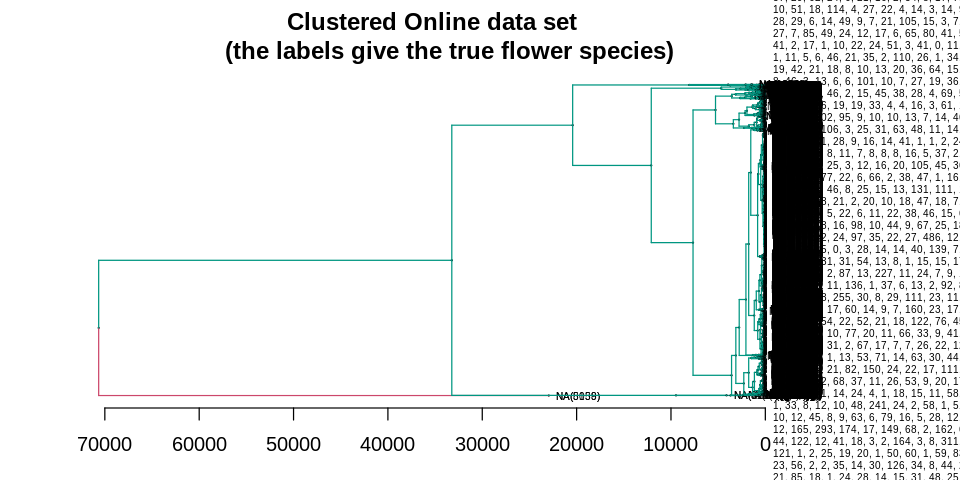

In [49]:
#Plot

par(mar = c(3,3,3,7))
plot(dend, 
     main = "Clustered Online data set
     (the labels give the true flower species)", 
     horiz =  TRUE,  nodePar = list(cex = .007))
#legend("topleft", legend = online.class)

In [50]:
install.packages("circlize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘GlobalOptions’, ‘shape’



Loading required namespace: circlize


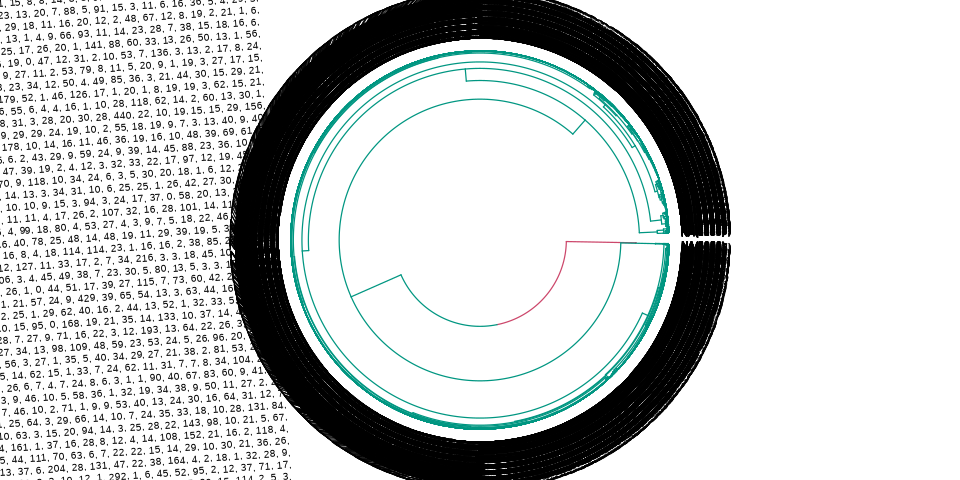

In [51]:
#Represent the same in a circular layout

par(mar= rep(0,4))
circlize_dendrogram(dend)

In [52]:
hclust_methods <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")
online_dendlist <- dendlist()
for(i in seq_along(hclust_methods)) {
   hc_iris <- hclust(d_online, method = hclust_methods[i])   
   online_dendlist <- dendlist(online_dendlist, as.dendrogram(hc_online))
}
names(online_dendlist) <- hclust_methods
online_dendlist

$ward.D
'dendrogram' with 2 branches and 12316 members total, at height 70653.61 

$single
'dendrogram' with 2 branches and 12316 members total, at height 70653.61 

$complete
'dendrogram' with 2 branches and 12316 members total, at height 70653.61 

$average
'dendrogram' with 2 branches and 12316 members total, at height 70653.61 

$mcquitty
'dendrogram' with 2 branches and 12316 members total, at height 70653.61 

$median
'dendrogram' with 2 branches and 12316 members total, at height 70653.61 

$centroid
'dendrogram' with 2 branches and 12316 members total, at height 70653.61 

$ward.D2
'dendrogram' with 2 branches and 12316 members total, at height 70653.61 

attr(,"class")
[1] "dendlist"

# PCA

In [55]:
install.packages('factoextra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘abind’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’



In [77]:
# We  pass online to the prcomp(). We also set two arguments, center and scale, 
# to be TRUE then preview our object with summary

df.pca <- prcomp(df[1:9], center = TRUE, scale. = TRUE)
summary(df.pca)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     1.8405 1.2917 1.0131 1.0017 0.9695 0.64983 0.59304
Proportion of Variance 0.3764 0.1854 0.1140 0.1115 0.1044 0.04692 0.03908
Cumulative Proportion  0.3764 0.5617 0.6758 0.7873 0.8917 0.93864 0.97772
                           PC8     PC9
Standard deviation     0.35076 0.27842
Proportion of Variance 0.01367 0.00861
Cumulative Proportion  0.99139 1.00000

In [78]:
# Calling str() to have a look at your PCA object

str(df.pca)

List of 5
 $ sdev    : num [1:9] 1.84 1.29 1.01 1 0.97 ...
 $ rotation: num [1:9, 1:9] 0.382 0.329 0.349 0.297 0.414 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:9] 2.318 80.906 0.504 34.506 31.764 ...
  ..- attr(*, "names")= chr [1:9] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
 $ scale   : Named num [1:9] 3.32 176.86 1.27 140.83 44.49 ...
  ..- attr(*, "names")= chr [1:9] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
 $ x       : num [1:12316, 1:9] -3.27 -1.43 -3.28 -2 -1.02 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:12316] "1" "2" "3" "4" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


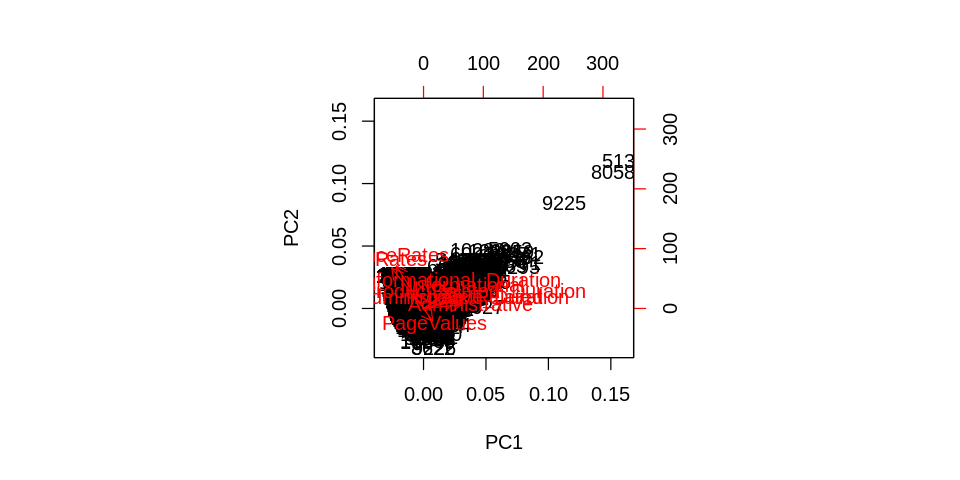

In [79]:
#Visualizing our pca using a biplot

biplot(df.pca)

In [80]:
#Extract the std from PCA result to calculate the variance

var= df.pca$sdev^2
(pve= var/sum(var))
cumsum(pve)

[1] 0.37637197 0.18538234 0.11403715 0.11148289 0.10444452 0.04691989 0.03907783
[8] 0.01367031 0.00861310

[1] 0.3763720 0.5617543 0.6757915 0.7872744 0.8917189 0.9386388 0.9777166
[8] 0.9913869 1.0000000

# t-Distributed Stochastic Neighbour Embedding

In [61]:
install.packages('Rtsne')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


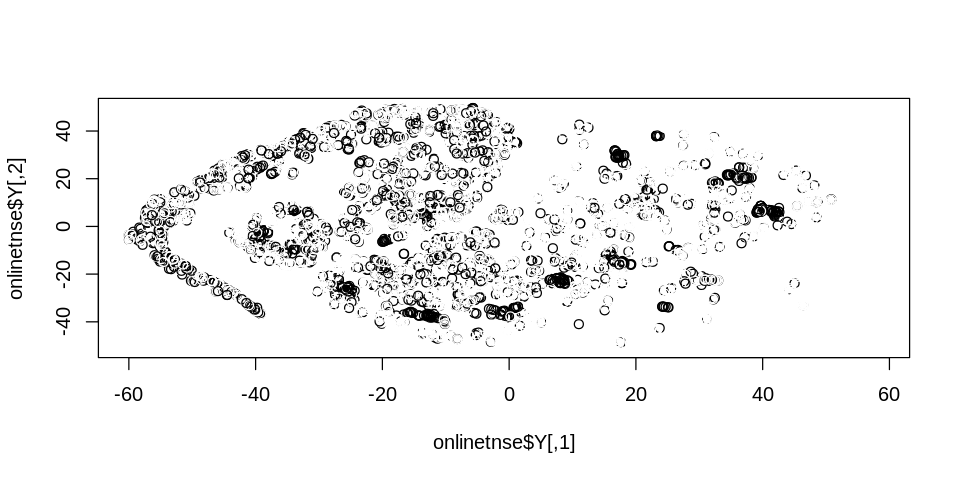

In [76]:
# Using the Rtnse function
# Removing any duplicated entrie in the dataset

#library("Rtsne")
uonline = unique(online[, 1:18])
onlinetnse = Rtsne(uonline[, 1:17])
plot(onlinetnse$Y, col= uonline$Revenue)

# CONCLUSION

We can deduce that **K means **is better than **Heirarchical** because we cannot deduce anything as the data is too large to plot correctly or rather it is too squeezed to harness information

To reduce our parameters we compared both PCA and t-Distributed Stochastic Neighbour Embedding, as much as both were working correctly we failed to deduce any information from both of them, because as you can see from their respective plots they are way to clustered.